# <span style='color:Blue'> Used Car Price Prediction  </span>
## <span style='color:Maroon'> A step-by-step approach to predict used car price using machine learning  </span>



## Potential Business: Pandemic-Driven Purchase

In the recent days, due to pandemic, many individuals are looking forward to owning a vehicle who otherwise preferred public transport and decrease the dependency on public tansport.<br>
The fear of contacting virus while using a public transport, prompted consumers to owning a vehicle.  Also, used cars are mostly preferred by those who cannot afford to buy new cars at higher prices. With the increase in prices of new vehicles and considering affrordability we can observe a trend in growth of used car market.<br>
In general, a seller decides a price at random and the buyer has no idea about the vehicle and it’s value the market. 
It could also be possible that the seller also has no idea about the vehicles’s value or the price at which he should be selling the car.<br>
To address this problem I have developed a Used Car Price Prediction system which can effectively determines the price of a vehicle using various features.<br>
I used a Regression Algorithms which can provide us with a continuous value as recommeded selling price.<br>


### Please vote up and share your feedback in the comment box, if you like this notebook. 

<div style="width:100%;text-align: center;"> <img src="https://ichef.bbci.co.uk/news/976/cpsprodpb/10316/production/_121162366_gettyimages-1233138884.jpg" width="500px"/> </div>

### Data Description
Selling_Price : The price of the used car in INR Lakhs.<br>
Name : The brand and model of the car.<br>
Location : The location in which the car is being sold or is available for purchase.<br>
Year : The year or edition of the model.<br>
Kilometers Driven : The total kilometers driven in the car by the previous owner(s) in KM.<br>
Fuel Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)<br>
Transmission : The type of transmission used by the car. (Automatic / Manual)<br>
Seller_Type : Whether the seller an Individual, Dealer or Trustmark Dealer.<br>
Owner Type : Whether the ownership is Firsthand, Second hand or other.<br>
Mileage : The standard mileage offered by the car company in kmpl(Petrol/Diesel) or km/kg(CNG/ LPG)<br>
Current_Mileage : Current mileage claimed by the seller.<br>
Engine : The displacement volume of the engine in CC.<br>
Power : The maximum power of the engine in bhp<br>
Seats : The number of seats in the car.<br>
New_Price : Latest price of vehicle.<br>

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import wordcloud
from wordcloud import WordCloud
from tabulate import tabulate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
%matplotlib inline

class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

In [4]:
train_data = pd.read_csv('train_data_2.csv')
test_data = pd.read_csv('test_data_2.csv')

# <span style='color:Blue'> Data Overview  </span>

Let us look at the data.

### Train Data

In [5]:
train_data.columns

Index(['Unnamed: 0', 'Selling_Price', 'Name', 'Location', 'Year',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Seller_Type',
       'Owner_Type', 'Mileage', 'Current_Mileage', 'Engine', 'Power', 'Seats',
       'New_Price'],
      dtype='object')

In [6]:
train_data.head()

,Unnamed: 0,Selling_Price,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seller_Type,Owner_Type,Mileage,Current_Mileage,Engine,Power,Seats,New_Price
0,0,1.75,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,Individual,First,26.6 km/kg,24.8 km/kg,998 CC,58.16 bhp,5.0,NaN
1,1,12.50,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,Individual,First,19.67 kmpl,15.5 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,2,4.50,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,Individual,First,18.2 kmpl,14.3 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,3,6.00,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,Individual,First,20.77 kmpl,21.2 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,4,17.74,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Dealer,Second,15.2 kmpl,12.9 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [7]:
print(color.BOLD + "There are {} rows and {} columns in the dataset.".format(train_data.shape[0],train_data.shape[1]),"\n"+ color.END)
print("The first column is unnamed which seems to be the index which can be deleted and reset the index.","\n")
train_data.drop('Unnamed: 0', axis=1, inplace=True)
print(color.BOLD +color.BLUE +"Let's look at the data types available in the dataset"+ color.END)
train_data.info()
print(color.BOLD +color.BLUE +"\n","Summary statistics of dataset"+ color.END)
train_data.describe()

There are 6017 rows and 16 columns in the dataset. 

The first column is unnamed which seems to be the index which can be deleted and reset the index. 

Let's look at the data types available in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selling_Price      6017 non-null   float64
 1   Name               6017 non-null   object 
 2   Location           6017 non-null   object 
 3   Year               6017 non-null   int64  
 4   Kilometers_Driven  6017 non-null   int64  
 5   Fuel_Type          6017 non-null   object 
 6   Transmission       6017 non-null   object 
 7   Seller_Type        6005 non-null   object 
 8   Owner_Type         6017 non-null   object 
 9   Mileage            6016 non-null   object 
 10  Current_Mileage    5985 non-null   object 
 11  Engine             5981 non-null   object 
 12  Power    

,Selling_Price,Year,Kilometers_Driven,Seats
count,6017.000000,6017.000000,6.017000e+03,5975.000000
mean,9.436084,2013.357986,5.875267e+04,5.279331
std,10.927617,3.269807,9.128049e+04,0.807854
min,0.440000,1998.000000,1.710000e+02,0.000000
25%,3.500000,2011.000000,3.400000e+04,5.000000
50%,5.640000,2014.000000,5.300000e+04,5.000000
75%,9.950000,2016.000000,7.300000e+04,5.000000
max,100.000000,2019.000000,6.500000e+06,10.000000


### Selling Price
selling price is given in INR Lakhs, we will multiply the columns with 1,00,000. to get the correct price.

In [8]:
train_data['Selling_Price'] = train_data['Selling_Price'].apply(lambda x: x*100000)

### Test Data

In [9]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Seller_Type,Owner_Type,Mileage,Current_Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,Dealer,First,32.26 km/kg,31 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Dealer,Second,24.7 kmpl,21.5 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,Dealer,First,13.68 kmpl,14.2 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,Dealer,First,23.59 kmpl,23.8 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,Dealer,First,18.5 kmpl,17.8 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [10]:
print(color.BOLD +"There are {} rows and {} columns in the dataset.".format(test_data.shape[0],test_data.shape[1]),"\n"+ color.END)
print("The first column is unnamed which seems to be the index which can be deleted and reset the index.","\n")
test_data.drop('Unnamed: 0', axis=1, inplace=True)
print(color.BOLD +color.BLUE +"Let's look at the data types available in the dataset"+ color.END)
test_data.info()
print(color.BOLD +color.BLUE +"\n","Summary statistics of dataset"+ color.END)
test_data.describe()

There are 1234 rows and 15 columns in the dataset. 

The first column is unnamed which seems to be the index which can be deleted and reset the index. 

Let's look at the data types available in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Seller_Type        1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Current_Mileage    1217 non-null   object 
 10  Engine             1224 non-null   object 
 11  Power              1224 non-null   object 
 12  Seats    

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


There are columns such as Current_Mileage, Engine, Power, Seats and New_Price which have null-values.<br>
Also, data type of appropriate columns have to be changed to meet the requirement.

## <span style='color:Maroon'> Converting to appropriate data type  </span>


Though data types of Year and Seats are 'int64' and 'float64' respectively, using them with the same datatype will not be useful for our evaluation.<br>
we need to convert these parameters into datetime and categorical(nominal) respectively.<br>
Also, Location, Fuel_type, Transmission, Owner_Type, Seller_Type can all be changed to categorical variables.<br>

### Seats Column
There are records where Seats is given as 0 which is misleading. This can be assumed that number of seats is not recorded for those enteries. We will consider this as NaN an impute them with make and model information.

In [11]:
def seats_(df):
    df['Seats'].replace(0, np.nan, inplace=True)
    df['Seats'] = df['Seats'].astype('category')

In [12]:
seats_(train_data)
seats_(test_data)

### Year column
we will calculate the age of vehicle from Year column and drop Year column.

In [13]:
current_year = datetime.datetime.now().year #get current year
def veh_age(df):
    df["vehicle_age"] = df['Year'].apply(lambda x: current_year-x)  # substract to get the year delta
    df.drop('Year', axis=1, inplace=True)

In [14]:
veh_age(train_data)
veh_age(test_data)

### Current_Mileage and Mileage
Current_Mileage and Mileage have units which have to be removed and these should be converted into appropriate datatype 'float64'.
When Fuel_Type is CNG/ LPG units for Current_Mileage and mileage are km/kg, when Fuel_Type is Petrol/ Diesel units are kmpl.
In addition there are values with 'null' in the column, null can be converted to NaN and imputed later on.
Units can be removed using regex or str operations.

In [15]:
pattern = '\s\D+[/]*\D+'

def mileage_(df):
    df['Current_Mileage'] = df['Current_Mileage'].replace(to_replace = pattern, value = '', regex = True)
    df['Current_Mileage'] = df['Current_Mileage'].astype(float)
    df['Mileage'] = df['Mileage'].replace(to_replace = pattern, value = '', regex = True)
    df['Mileage'] = df['Mileage'].astype(float)

In [16]:
mileage_(train_data)
mileage_(test_data)

# <span style='color:Blue'> Feature Engineering  </span>

## <span style='color:Maroon'> Missing  Value Treatment  </span>

### Check for null/ nan in Dataset

In [17]:
def checknull(df):
    # printing column name where null is present
    col_name = df.isnull().sum(axis=0).sort_values(ascending = False)
    print(col_name)    

In [18]:
print(color.BOLD +"printing column name where null is present in train data"+ color.END, '\n')
checknull(train_data)
print(color.BOLD +"printing column name where null is present in test data"+ color.END, '\n')
checknull(test_data)

printing column name where null is present in train data 

New_Price            5194
Seats                  43
Engine                 36
Power                  36
Current_Mileage        32
Seller_Type            12
Mileage                 1
Selling_Price           0
Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
vehicle_age             0
dtype: int64
printing column name where null is present in test data 

New_Price            1052
Current_Mileage        17
Seats                  11
Engine                 10
Power                  10
Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Seller_Type             0
Owner_Type              0
Mileage                 0
vehicle_age             0
dtype: int64


In [19]:
print(color.BOLD +"There are many null values in New_Price. It is very difficult to impute those values. Hence we will drop that column from both test and train data.","\n"+ color.END)

There are many null values in New_Price. It is very difficult to impute those values. Hence we will drop that column from both test and train data. 



In [20]:
train_data.drop('New_Price', axis=1, inplace=True)

In [21]:
test_data.drop('New_Price', axis=1, inplace=True)

In [22]:
print(color.BOLD +'Rows with NaN in Mileage in train data',"\n"+ color.END)
train_data[train_data['Mileage'].isna()]

Rows with NaN in Mileage in train data 



,Selling_Price,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Seller_Type,Owner_Type,Mileage,Current_Mileage,Engine,Power,Seats,vehicle_age
4903,1275000.0,Toyota Prius 2009-2016 Z4,Mumbai,44000,Electric,Automatic,Individual,First,NaN,NaN,1798 CC,73 bhp,5.0,10


In [23]:
print(color.BOLD +"There are {} row entries for electric vehicle in train data.".format(train_data['Fuel_Type'][train_data['Fuel_Type'] == 'Electric'].count()),"\n"+ color.END)

There are 2 row entries for electric vehicle in train data. 



In [24]:
print(color.BOLD +"There are {} row entries for electric vehicle in test data.".format(test_data['Fuel_Type'][test_data['Fuel_Type'] == 'Electric'].count()),"\n"+ color.END)

There are 0 row entries for electric vehicle in test data. 



For electric vehicle instead of mileage there is a parameter called range.<br>Range is Distance km/Charge.
Also there is no Electric in fuel type in test data. To maintain uniformity these two rows can be dropped.

In [25]:
# Get indexes where Fuel_Type column has value Electric
indexNames = train_data[train_data['Fuel_Type'] == 'Electric'].index
 
# Delete these row indexes from dataFrame
train_data.drop(indexNames , inplace=True, axis=0)

There are records where Current_Mileage is given as 0 which is misleading. This can be assumed that the Current_Mileage is not recorded.
We will consider this as NaN an replace during imputation with the mileage value given by the manufacturer.<br>

## <span style='color:Maroon'> Removing suffixes from values in a column  </span>


For Engine units are CC.<br>For Power units are bhp. In addition there are values with 'null bhp' in the column, null can be converted to NaN and imputed later on. <br>
Units can be removed using regex or str operations. 

In [26]:
pattern = '\s\D+[/]*\D+'

def curmil_eng_pow(df):
    df['Current_Mileage'].replace(0, np.nan, inplace=True)
    df['Mileage'].replace(0, np.nan, inplace=True)
    print("There are {} null in Current_Mileage.Replace them with the mileage value".format(df['Current_Mileage'].isna().sum()),"\n")
    df.Current_Mileage.fillna(df.Mileage, inplace=True)
    
    df['Engine'] = df['Engine'].replace(to_replace = pattern, value = '', regex = True)
    df['Engine'] = df['Engine'].astype("float").astype("Int64")
    df['Power'] = pd.to_numeric(df['Power'].str.lower().str.split().str.get(0).str.replace('null',''), errors='coerce')

In [27]:
print(color.BOLD +"Treating train data"+ color.END, '\n')
curmil_eng_pow(train_data)
print(color.BOLD +"Treating test data"+ color.END, '\n')
curmil_eng_pow(test_data)

print("Remove units and change datatype for Engine and Power")


Treating train data 

There are 87 null in Current_Mileage.Replace them with the mileage value 

Treating test data 

There are 26 null in Current_Mileage.Replace them with the mileage value 

Remove units and change datatype for Engine and Power


## <span style='color:Maroon'> Splitting columns  </span>

We can extract the Make and model infomation from name.<br>
We can split Make and Model into separate columns which can be used further  and drop name column.

In [28]:
def get_make_and_model(df):
    
    #Get the Make from the name
    make_list=list(df['Name'].str.lower())
    i=0

    for item in make_list:
        make_list[i] = item.split(' ')[0]

        i=i+1

    # replace formated Names into Make  
    df['Make']=make_list
    
    #Get the Model from the name
    model_list=list(df['Name'].str.lower())
    i=0

    for item in model_list:
        model_list[i] = item.split(' ')[0]+'_'+item.split(' ')[1]

        i=i+1

    # replace formated Names into Model  
    df['Model']=model_list
    
    #Drop name column
    df.drop('Name', axis=1, inplace=True)

In [29]:
get_make_and_model(train_data)
get_make_and_model(test_data)

## <span style='color:Maroon'> Impute missing values  </span>

Impute missing values in 'Power','Mileage', 'Seats','Engine','Seller_Type'.<br>

Vehicles with different variants of under same Make and Model tend to have same Engine capacity and Power.<br>
All missing values in Engine and Power column, missing values can be imputed based on the Make and Model information available.<br>

In [30]:
train_data=  train_data.sort_values(['Make','Model'])
for column in ['Power','Mileage', 'Seats','Engine','Seller_Type']:
    train_data[column].fillna(method='ffill', inplace=True)

In [31]:
test_data=  test_data.sort_values(['Make','Model'])
for column in ['Power','Mileage', 'Seats','Engine','Seller_Type']:
    test_data[column].fillna(method='ffill', inplace=True)

## <span style='color:Maroon'> Checking Distribution of Numeric Variables  </span>


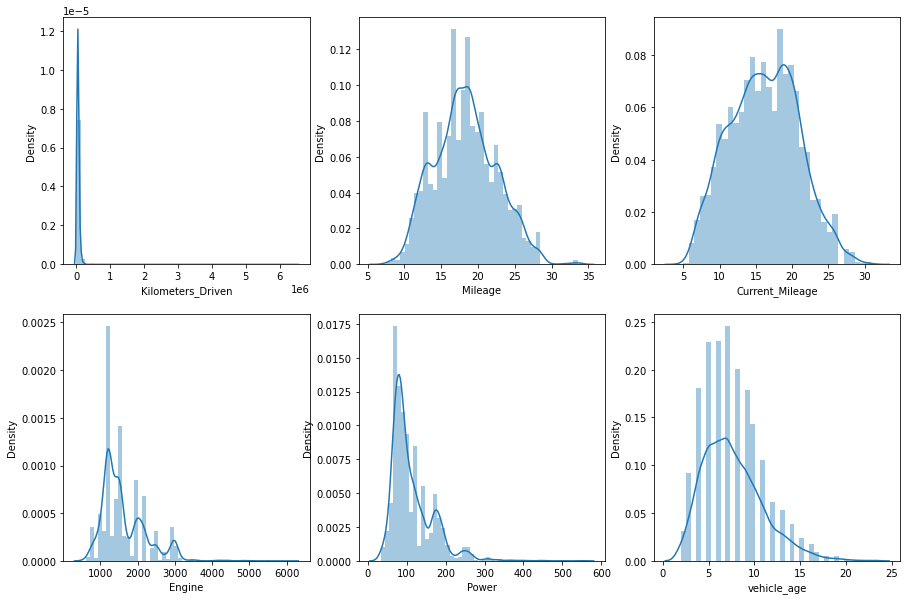

In [32]:
numeric_traindf = train_data.select_dtypes(include=['int64','float']).drop(columns=['Selling_Price'])

row_nums = 2  # how many rows of plots
col_nums = 3  # how many plots per row

# Create the subplots
fig, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15, 10))

for i, column in enumerate(numeric_traindf.columns):
    sns.distplot(numeric_traindf[column],ax=axes[i//col_nums,i%col_nums])
    #sns.histplot(numeric_traindf[column],ax=axes[i//col_nums,i%col_nums], color="red", kde=True)


    
# "i//ncols gives the floor division which is the row when you are working left to right then top to bottom.
# i%ncols will give you the integer remainder which is the column when you are working left to right top to bottom."

* Distribution of kilometers_driven is highly positive skewed
* Distribution of Engine, Power and vehicle_age are moderately positive skewed. 

In [33]:
numeric_traindf.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Kilometers_Driven,58.711910,4122.991359
Mileage,0.219672,-0.280579
Current_Mileage,0.072462,-0.553288
Engine,1.414046,3.010772
Power,1.849557,5.837669
vehicle_age,0.846093,0.894725


As rule of thumb, skewness can be interpreted like this: <br>

Skewness<br>
Fairly Symmetrical	-0.5 to 0.5<br>
Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0<br>
Highly Skewed	< -1.0 and > 1.0<br>

## <span style='color:Maroon'> Correlation between variables  </span>

### Relation between Mileage, Engine and Power

Over period, values specified by manufaturer such as Mileage, Engine and Power will eventually change due to wear and tear, hence we will drop these columns.<br>
Also, the values are given by the manufacturer cannot be a deciding factor to buy a vehicle.<br>
For understanding we can check the correlation with the target value(used car price).<br>
These are the data given by the manufaturer.<br>

                 Selling_Price   Mileage  Current_Mileage    Engine     Power
Selling_Price         1.000000 -0.336658        -0.311500  0.662560  0.773172
Mileage              -0.336658  1.000000         0.920549 -0.640797 -0.545029
Current_Mileage      -0.311500  0.920549         1.000000 -0.599200 -0.498446
Engine                0.662560 -0.640797        -0.599200  1.000000  0.860156
Power                 0.773172 -0.545029        -0.498446  0.860156  1.000000


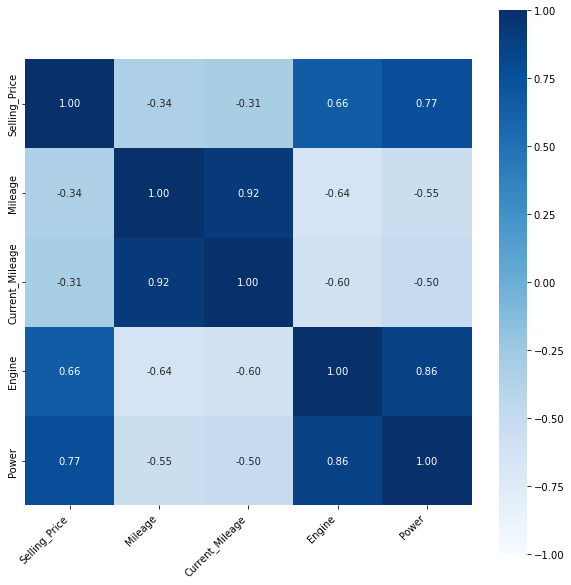

In [34]:
%matplotlib inline
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
df_cor = train_data.select_dtypes(include=['int64','float']).drop(columns=['Kilometers_Driven', 'vehicle_age'])
corr = df_cor.corr()
print(corr)

fig, ax = plt.subplots(figsize=(10,10))
#ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap= sns.diverging_palette(20, 220, as_cmap=True), square=True, annot=True, fmt='.1f')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap= 'Blues', square=True, annot=True, fmt='.2f')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right');

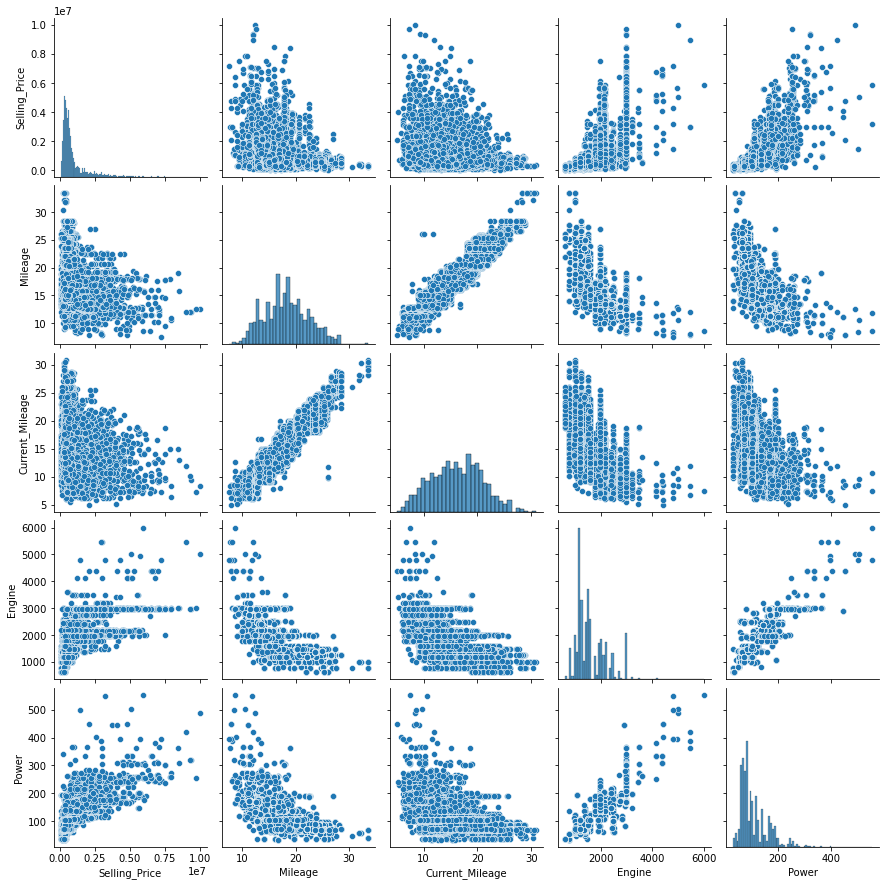

In [35]:
sns.pairplot(df_cor)

* selling_Price(used car price) has a moderate correlation with Power and low correlation with the mileage.<br>
* Engine and Power have high correlation with each other.<br>
* Mileage and Current_Mileage have high correlation with each other.<br>
* Based on correlation we will Drop 'Mileage','Engine' columns.

In [36]:
drop_column_list=['Mileage','Engine']
train_data.drop(drop_column_list, axis=1, inplace=True)
train_data.reset_index(drop=True, inplace=True)

In [37]:
test_data.drop(drop_column_list, axis=1, inplace=True)
test_data.reset_index(drop=True, inplace=True)

## <span style='color:Maroon'> Outlier Treatment  </span>

In [38]:
train_data.select_dtypes(include=['int64','float']).describe()

,Selling_Price,Kilometers_Driven,Current_Mileage,Power,vehicle_age
count,6.015000e+03,6.015000e+03,6015.000000,6015.000000,6015.000000
mean,9.434941e+05,5.875658e+04,16.149742,112.854595,7.642062
std,1.092925e+06,9.129540e+04,4.709114,53.548409,3.270032
min,4.400000e+04,1.710000e+02,5.000000,34.200000,2.000000
25%,3.500000e+05,3.400000e+04,12.600000,74.945000,5.000000
50%,5.630000e+05,5.300000e+04,16.200000,93.700000,7.000000
75%,9.950000e+05,7.300000e+04,19.600000,138.100000,10.000000
max,1.000000e+07,6.500000e+06,30.900000,552.000000,23.000000


### Relation between Kilometers_Driven and vehicle_age

Third Quartile and above values in Kilometers_Driven have very high values. We will look at them closely to get an understanding about them.

In [39]:
# Get indexes where Fuel_Type column has value Electric
train_data[train_data['Kilometers_Driven'] >= 300000]

,Selling_Price,Location,Kilometers_Driven,Fuel_Type,Transmission,Seller_Type,Owner_Type,Current_Mileage,Power,Seats,vehicle_age,Make,Model
483,6500000.0,Chennai,6500000,Diesel,Automatic,Individual,First,10.4,258.00,5.0,4,bmw,bmw_x5
1300,500000.0,Kolkata,480000,Petrol,Manual,Individual,First,12.8,117.30,5.0,6,honda,honda_city
1960,270000.0,Chennai,620000,Petrol,Manual,Individual,First,20.9,78.90,5.0,12,hyundai,hyundai_i10
2288,445000.0,Bangalore,445000,Petrol,Manual,Individual,First,17.6,82.90,5.0,8,hyundai,hyundai_i20
4950,750000.0,Kolkata,775000,Diesel,Automatic,Dealer,First,18.2,141.00,5.0,8,skoda,skoda_octavia
5151,100000.0,Jaipur,300000,Diesel,Manual,Individual,First,17.2,70.00,5.0,13,tata,tata_indigo
5714,1300000.0,Chennai,480000,Diesel,Automatic,Individual,First,11.5,138.03,5.0,6,volkswagen,volkswagen_jetta
5915,590000.0,Chennai,720000,Diesel,Manual,Individual,First,21.5,103.60,5.0,8,volkswagen,volkswagen_vento


There is one entry where Kilometers_Driven is 6500000 which is not likely possible considering age of the vehicle.<br> we will replace this value by max of km driven based on age of that vehicle.<br>

In [40]:
index_=train_data.loc[train_data['Kilometers_Driven'] == train_data['Kilometers_Driven'].max()].index.item()
vehicle_age_=train_data['vehicle_age'][train_data['Kilometers_Driven'] == train_data['Kilometers_Driven'].max()].item()

print(color.BOLD +"Maximum in Kilometers_Driven is {}, this is an outlier".format(train_data['Kilometers_Driven'].max()), "\n"+ color.END)
print(color.BOLD +"Index of this row is {} and age of this vehicle is {}".format(index_,vehicle_age_), "\n"+ color.END)

Maximum in Kilometers_Driven is 6500000, this is an outlier 

Index of this row is 483 and age of this vehicle is 4 



In [41]:
train_data['Kilometers_Driven'] = train_data['Kilometers_Driven'].replace(train_data['Kilometers_Driven'].max(),np.NaN)
replace_=train_data['Kilometers_Driven'].groupby(train_data['vehicle_age']).get_group(vehicle_age_).max()
print(color.BOLD +"Maximum Kilometers_Driven by vehicles with age of {} is {}".format(vehicle_age_,replace_), "\n"+ color.END)

Maximum Kilometers_Driven by vehicles with age of 4 is 148000.0 



In [42]:
train_data['Kilometers_Driven'].fillna(replace_,inplace=True)

There are very few vehicles which have recorded very high values in Kilometers_Driven, we will limit these values to 300000.

In [43]:
train_data['Kilometers_Driven'].mask(train_data['Kilometers_Driven'] > 300000, 300000, inplace=True)

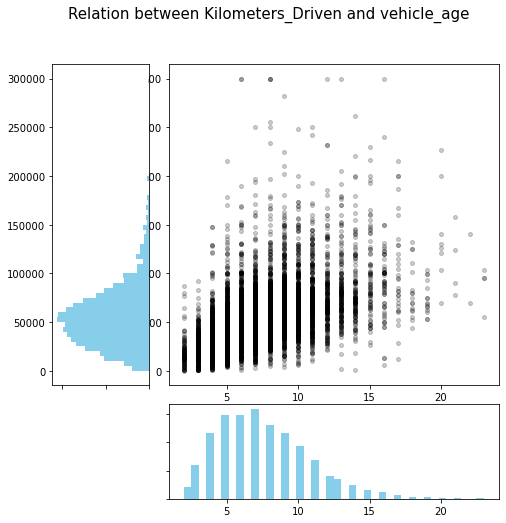

In [44]:
# Set up the axes with gridspec
x=train_data['vehicle_age']
y=train_data['Kilometers_Driven']

# Set up the axes with gridspec
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=4, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
#x_hist.invert_yaxis()

y_hist.hist(y, 60, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()

# Title 
plt.suptitle('Relation between Kilometers_Driven and vehicle_age', size = 15);

Though we have addressed the skewness in Kilometers_Driven data, from the above plot we can see that distribution of data is skewed.<br>
We will use box-cox transformation to address the skewness and normalize the data.

## <span style='color:Maroon'> Box-Cox Transformation for numeric variables variables  </span>


In [45]:
# Check if the data type of all columns is same in train _data and test_data
#train_data.info()
#test_data.info()
test_data['Kilometers_Driven'] = test_data['Kilometers_Driven'].astype(float)

In [46]:
numeric_traindf = train_data.select_dtypes(include=['int64','float']).drop(columns=['Selling_Price']).apply(lambda x: stats.boxcox(x)[0])
numeric_testdf = test_data.select_dtypes(include=['int64','float']).apply(lambda x: stats.boxcox(x)[0])


In [47]:
# Replace original data with box-cox ransformed data
train_data.loc[:, ['Kilometers_Driven', 'Current_Mileage', 'vehicle_age','Power']] = numeric_traindf[['Kilometers_Driven', 'Current_Mileage', 'vehicle_age','Power']]
test_data.loc[:, ['Kilometers_Driven', 'Current_Mileage', 'vehicle_age','Power']] = numeric_testdf[['Kilometers_Driven', 'Current_Mileage', 'vehicle_age','Power']]


In [48]:
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

print(color.BOLD +"There are no more null values in train_data and test data"+ color.END)

False
False
There are no more null values in train_data and test data


We have successfully imputed all the missing values, normalized the data. This way we can be assured that we have not lost any data.
Since the number of missing values is not high we can also choose to delete those rows. But that will lead to loss of data.

## <span style='color:Maroon'> Data Grouping</span>

We can group categories within column for category variables. In this method we will check the unique categories within the categorical variables and reduce the number of categories keeping highly appropriate categories.

Number of unique values in Transmission is 2 



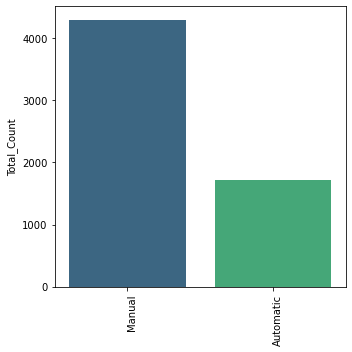

Manual transmission is most popular.

 -------------------------------------------------------------------------------------------------
Number of unique values in Fuel_Type is 4 



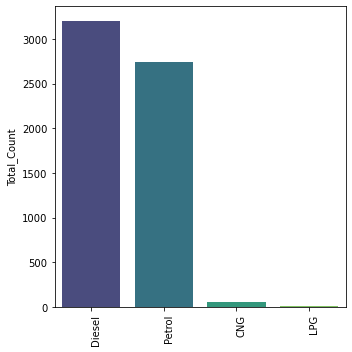

Many vehicles that are sold are diesel vehicles, followed by petrol vehicles.

 -------------------------------------------------------------------------------------------------
Number of unique values in Seller_Type is 3 



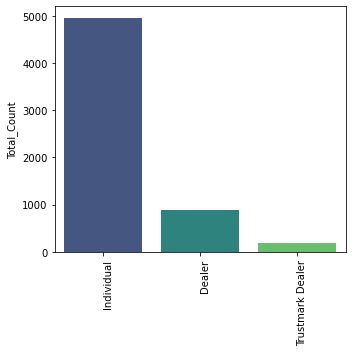

Most sellers are indivisual sellers.

 -------------------------------------------------------------------------------------------------
Number of unique values in Owner_Type is 4 



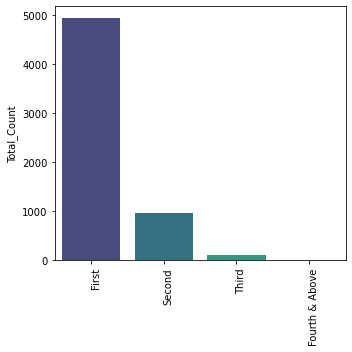

Many vehicles that are sold are first hand vehicles.

 -------------------------------------------------------------------------------------------------
Number of unique values in Seats is 8 



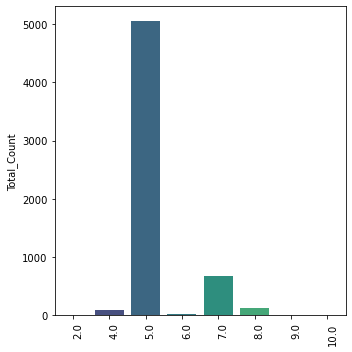

5 seater vehicles are owned by majority of the users.

 -------------------------------------------------------------------------------------------------
Number of unique values in Location is 11 



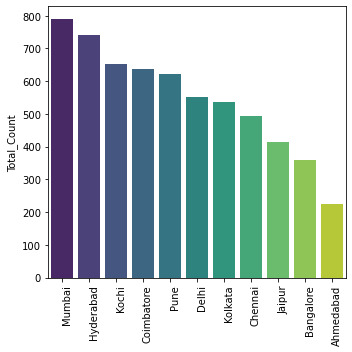

Popular locaitions where the vehicle is available for purchase are Mumbai, Hyderabad and kochi

 -------------------------------------------------------------------------------------------------


In [49]:
%matplotlib inline
cat_column_list={'Transmission': 'Manual transmission is most popular.',
                 'Fuel_Type':'Many vehicles that are sold are diesel vehicles, followed by petrol vehicles.',
                 'Seller_Type':'Most sellers are indivisual sellers.',
                 'Owner_Type':'Many vehicles that are sold are first hand vehicles.',
                 'Seats':'5 seater vehicles are owned by majority of the users.',
                 'Location':'Popular locaitions where the vehicle is available for purchase are Mumbai, Hyderabad and kochi'}

for column in cat_column_list.keys():
    #uniques = train_data[column].values
    #total_unique=len(list(np.unique(uniques)))
    count_uniques = pd.DataFrame(train_data[column].value_counts()).rename(columns={column:'Total_Count'}).sort_values('Total_Count',ascending=False)
    
    # parameters in format function.
    print(color.BOLD +"Number of unique values in {} is {}".format(column, count_uniques.shape[0]), "\n"+ color.END)
    #print("Unique value count in {}".format(column))
    #print(count_uniques)

    # Create Figure
    fig, ax = plt.subplots(figsize=(5,5))

    ax = sns.barplot(x=count_uniques.index.values.tolist()  , y="Total_Count", data=count_uniques, palette= 'viridis')
    # rotates labels and aligns them horizontally to left 
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

    plt.tight_layout()
    plt.show()
    print("{}".format(cat_column_list[column]))

    print("\n",'-------------------------------------------------------------------------------------------------')

Number of unique values in Model is 216 



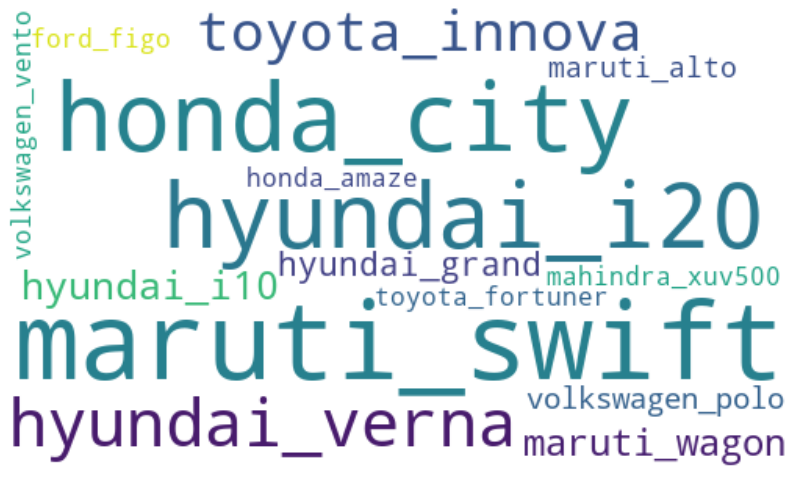

In [50]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(14, 9))
count_uniques = pd.DataFrame(train_data['Model'].value_counts()).reset_index().rename(columns={'index':'options','Model':'Total_Count'}).sort_values('Total_Count', ascending=False)

print(color.BOLD +"Number of unique values in Model is {}".format(count_uniques.shape[0]), "\n"+ color.END)

dictionary = pd.Series(count_uniques.Total_Count.values,index=count_uniques.options).to_dict()

wordcloud = WordCloud(max_font_size=800, background_color='white', colormap='viridis', width=500, height=300, max_words=15).generate_from_frequencies(dictionary)

plt.imshow(wordcloud, interpolation='bilinear') # image show
plt.axis('off'); # to off the axis of x and y


Number of unique values in Make is 29 



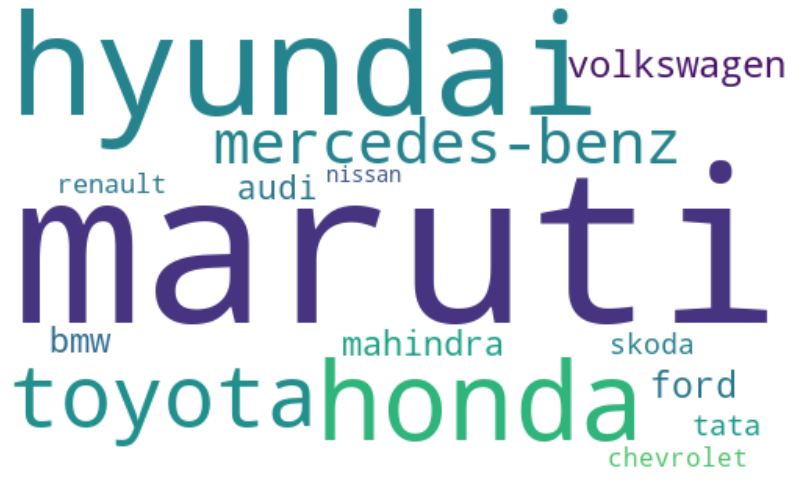

In [51]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(14, 9))
count_uniques = pd.DataFrame(train_data['Make'].value_counts()).reset_index().rename(columns={'index':'options','Make':'Total_Count'}).sort_values('Total_Count', ascending=False)

print(color.BOLD +"Number of unique values in Make is {}".format(count_uniques.shape[0]), "\n"+ color.END)

dictionary = pd.Series(count_uniques.Total_Count.values,index=count_uniques.options).to_dict()

wordcloud = WordCloud(max_font_size=800, background_color='white', colormap='viridis', width=500, height=300, max_words=15).generate_from_frequencies(dictionary)

plt.imshow(wordcloud, interpolation='bilinear') # image show
plt.axis('off'); # to off the axis of x and y



In [52]:
print(color.BOLD +"Aggregate statistics for Selling_price"+ color.END)
train_data['Selling_Price'].describe()

Aggregate statistics for Selling_price


count    6.015000e+03
mean     9.434941e+05
std      1.092925e+06
min      4.400000e+04
25%      3.500000e+05
50%      5.630000e+05
75%      9.950000e+05
max      1.000000e+07
Name: Selling_Price, dtype: float64

In [53]:
#train_data[train_data.Selling_Price==train_data.Selling_Price.min()]

vehicle_ = train_data['Model'][train_data.Selling_Price==train_data.Selling_Price.min()]
print("One {} vehicle was sold at {} INR, lowest in the dataset".format(vehicle_.item(), train_data.Selling_Price.min()))
vehicle_ = train_data['Model'][train_data.Selling_Price==train_data.Selling_Price.max()]
print("One {} vehicle was sold at {} INR, highest in the dataset".format(vehicle_.item(), train_data.Selling_Price.max()))

One tata_nano vehicle was sold at 44000.0 INR, lowest in the dataset
One jaguar_f vehicle was sold at 10000000.0 INR, highest in the dataset


In [54]:
#train_data['Selling_Price'].loc[train_data['Make'] == 'nissan'].describe()

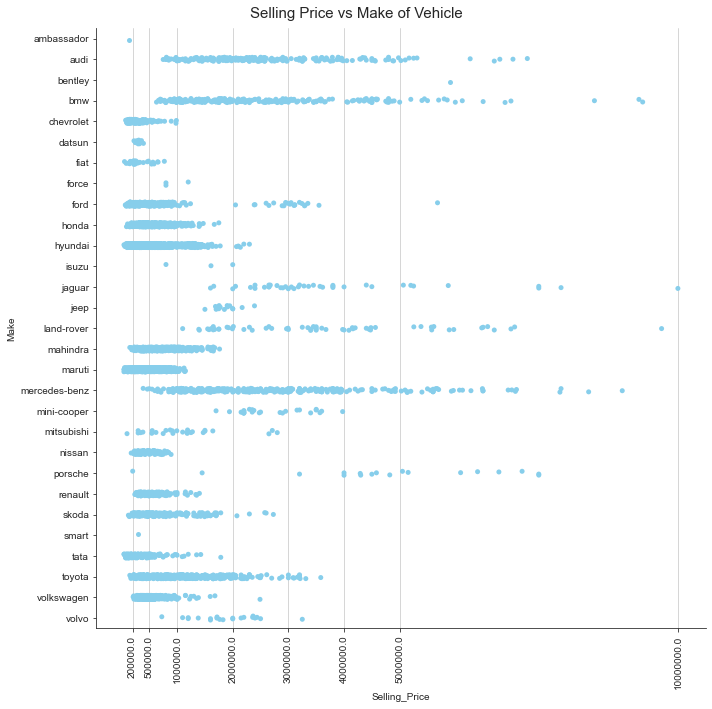

-------------------------------------------------------------------------------------------------


In [55]:
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.catplot(data=train_data, x='Selling_Price', y='Make',height=10, color='skyblue')  

# rotates labels and aligns them horizontally to left 
plt.suptitle('Selling Price vs Make of Vehicle', size = 15);

ax.set(xticks=(2e+05,5e+05,1e+06,2e+06,3e+06,4e+06,5e+06,1e+07))
ax.set_xticklabels((2e+05,5e+05,1e+06,2e+06,3e+06,4e+06,5e+06,1e+07), rotation=90)

plt.tight_layout()
plt.show()

print('-------------------------------------------------------------------------------------------------')

* Selling price of maruti vehicles are between 45000 and 1150000 INR.<br>
* Selling price of hyundai vehicles is mostly between 45000 and 1800000 INR but there are some vehicle which were sold for more than 2000000 INR.<br>
* Majority of honda vehicles are sold between 90000 and 1200000 INR.<br>
* Minimum selling price of nissan vehicles is 175000 and maximum selling price is 892000 INR.<br>
* Selling price of maruti vehicles are between 45000 and 1150000 INR.

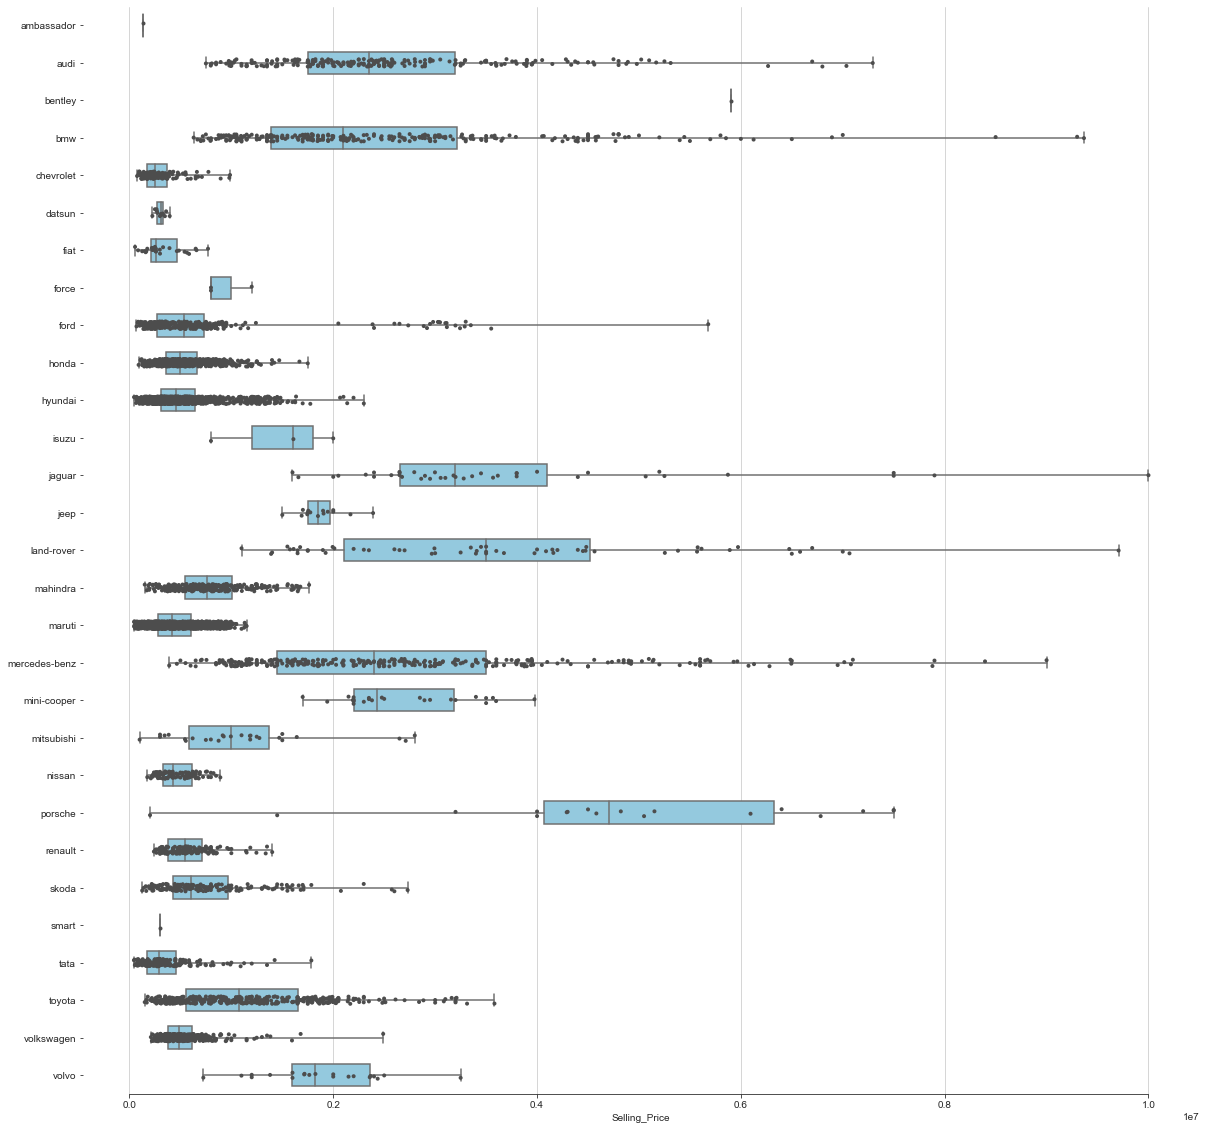

In [56]:
sns.set_style("ticks",{'axes.grid' : True})

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 20))

# Plot the orbital period with horizontal boxes
sns.boxplot(data=train_data, x='Selling_Price', y='Make',
            whis=[0, 100], width=.6, color='skyblue')

# Add in points to show each observation
sns.stripplot(data=train_data, x='Selling_Price', y='Make',
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

* Selling price of Audi, Mercedes-Benz and BMW vehicles are spread over a wide range.
* The median value of Audi, Mercedes-Benz, BMW and Mini brands of vehicles is above 20Lakhs INR.
* Median value of Jaguar and Land Rover vehicles is above 30Lakh INR.
* 1st Quartile value of Porsche is above 40Lakhs INR.

In [57]:
count_uniques = pd.DataFrame(train_data['Make'].value_counts()).rename_axis('Make').rename(columns={'Make':'Total_Count'})[24:30]
print(tabulate(count_uniques, headers = ["Make", "Total_Count "], tablefmt="pretty"),'\n')
print("There are very few vehicles in our dataset of {}".format(count_uniques.index.tolist()))
vehicle_ = train_data.loc[train_data['Make'] == 'bentley']
print("There is only one {} vehicle was sold at {} INR".format(vehicle_.Model.item(), vehicle_.Selling_Price.item()))
vehicle_ = train_data.loc[train_data['Make'] == 'ambassador']
print("There is only one {} vehicle was sold at {} INR".format(vehicle_.Model.item(), vehicle_.Selling_Price.item()))
vehicle_ = train_data.loc[train_data['Make'] == 'smart']
print("There is only one {} vehicle was sold at {} INR".format(vehicle_.Model.item(), vehicle_.Selling_Price.item()))

+------------+--------------+
|    Make    | Total_Count  |
+------------+--------------+
|   isuzu    |      3       |
|   force    |      3       |
|   smart    |      1       |
|  bentley   |      1       |
| ambassador |      1       |
+------------+--------------+ 

There are very few vehicles in our dataset of ['isuzu', 'force', 'smart', 'bentley', 'ambassador']
There is only one bentley_continental vehicle was sold at 5900000.0 INR
There is only one ambassador_classic vehicle was sold at 135000.0 INR
There is only one smart_fortwo vehicle was sold at 300000.0 INR


## <span style='color:Maroon'> categorical variables into Binary variables and adding new columns </span>

* If vehicle is in top 15 in Make, encode the column value as 1 else 0 in Make_15_BIN
* If vehicle is in top 15 in Model, encode the column value as 1 else 0 in Model_15_BIN
* If Location is in list of metero cities ['Chennai','Delhi','Mumbai','Kolkata','Ahmedabad','Bangalore','Hyderabad','Pune'], encode the column value as 1 else 0 in Model_15_BIN
* If Fuel_Type is other than Petrol or Diesel, change it to 'Gas_fuel'
* If Owner_Type is other than First or Second, change it to 'Third&above'
* If Seats are other than 2,4,5, change to '6nabove'
* If Seller_Type other than 'Individual' change to 'Dealer'
* If the Make is among 'audi','bentely','bmw','jaguar','land-rover','mercedes-benz','mini-cooper','porsche' then it is a premium vehicle

In [58]:
# Change the categorical variables into Binary variable

fuel_list= ['Diesel','Petrol']
Owner_Type= ['First','Second']
Seats= [2,4,5]
Seller_Type= ['Individual']
Make_top15_list= train_data.Make.value_counts().index[0:15].to_list()
Model_top15_list= train_data.Model.value_counts().index[0:15].to_list()
Metro_city_list= ['Chennai','Delhi','Mumbai','Kolkata','Ahmedabad','Bangalore','Hyderabad','Pune']
premiumvehicles = ['audi','bentely','bmw','jaguar','land-rover','mercedes-benz','mini-cooper','porsche']
def Binary_variable(df):
    df['Fuel_Type'] = df['Fuel_Type'].apply(lambda x: x if x in fuel_list else 'Gas_fuel')
    df['Owner_Type'] = df['Owner_Type'].apply(lambda x: x if x in Owner_Type else 'Third&above')
    df['Seats'] = df['Seats'].apply(lambda x: x if x in Seats else '6nabove')
    df['Seller_Type'] = df['Seller_Type'].apply(lambda x: x if x in Seller_Type else 'Dealer')
    df['Make_15_BIN'] = df['Make'].apply(lambda x: 1 if x in Make_top15_list else 0)#.astype('category')
    df['Model_15_BIN'] = df['Model'].apply(lambda x: 1 if x in Model_top15_list else 0)#.astype('category')
    df['Location'] = df['Location'].apply(lambda x: 1 if x in Metro_city_list else 0)
    df['Premium_vehicle'] = df['Make'].apply(lambda x: 1 if x in premiumvehicles else 0)


Binary_variable(train_data)
Binary_variable(test_data)

Delete Make and Model columns 

In [59]:
drop_column_list=['Make', 'Model']
train_data.drop(drop_column_list, axis=1, inplace=True)
test_data.drop(drop_column_list, axis=1, inplace=True)
#train_data.info()
#test_data.info()

## <span style='color:Maroon'> Dummy Variable Creation </span>

In [60]:
# generate binary values using get_dummies
train_df = pd.get_dummies(train_data)
test_df = pd.get_dummies(test_data)
#train_df.shape
#test_df.shape

## <span style='color:Maroon'> Correlation matrix </span>

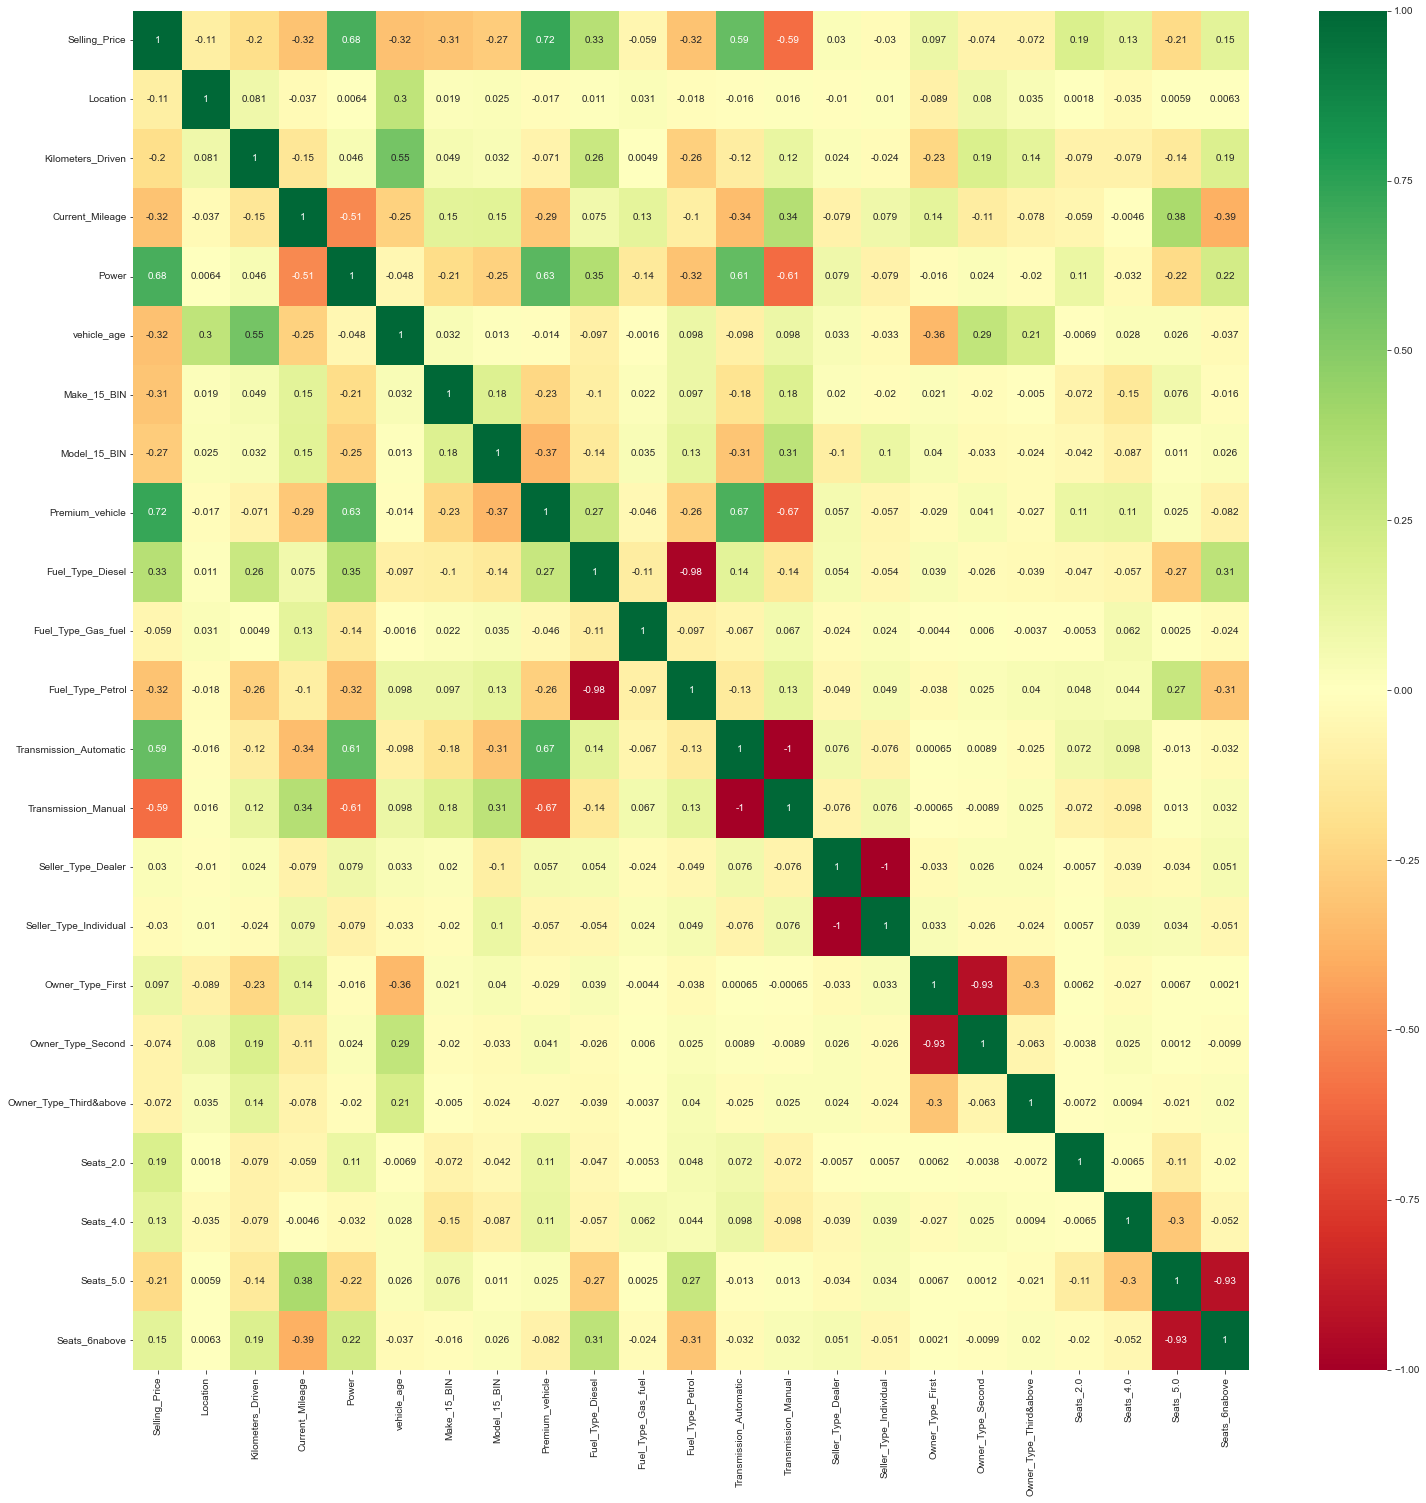

In [61]:
corrmat=train_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can delete columns which have high correlation with other columns.<br>Fuel_Type_Diesel-Fuel_Type_Petrol,<br> Transmission_Automatic-Transmission_Manual,<br> Seller_Type_Dealer-Seller_Type_Individual, <br>Owner_Type_Second-Owner_Type_First,<br> Seats_6nabove-Seats5.0 <br> have high correlation with each other. <br>Hence we can drop
'Fuel_Type_Diesel', 'Transmission_Automatic','Seller_Type_Dealer', 'Owner_Type_Second', 'Seats_6nabove'

In [62]:
drop_column_list=['Fuel_Type_Diesel', 'Transmission_Automatic','Seller_Type_Dealer', 'Owner_Type_Second', 'Seats_6nabove']

train_df.drop(columns=[col for col in train_df if col in drop_column_list], inplace=True)
test_df.drop(columns=[col for col in test_df if col in drop_column_list], inplace=True)

#train_df.drop(drop_column_list, axis=1, inplace=True)
#test_df.drop(drop_column_list, axis=1, inplace=True)

In [63]:
#train_df.columns
#test_df.columns
#train_df[train_df.isin([np.nan, np.inf, -np.inf]).any(1)]
#test_df[test_df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [64]:
#train_df.to_csv("train_df_check.csv")

## <span style='color:Maroon'> Feature Importance </span>

With feature importance we can understand which features are very important for price prediction 

[7.66327835e-03 3.03320778e-02 1.98728282e-02 1.22307857e-01
 1.59201015e-01 2.04968327e-02 8.46382554e-03 5.24686511e-01
 3.67609210e-04 1.11226483e-02 1.60757149e-02 6.11334277e-03
 5.98075124e-03 2.14072164e-04 1.84792352e-03 4.34670233e-03
 6.09070100e-02]


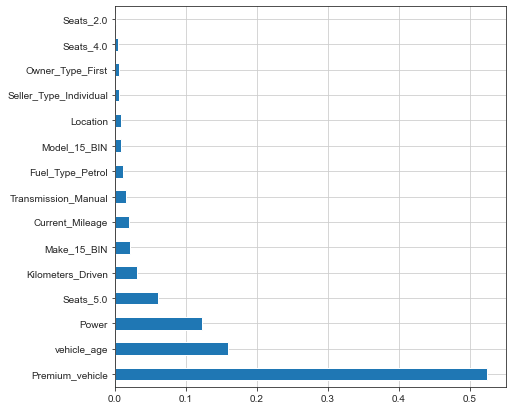

In [65]:
X = train_df.iloc[:,1:]  #independent columns
y = train_df.iloc[:,0]    #target column Selling_Price

plt.figure(figsize=(7,7))

model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.show()

* Transmission type is the very important feature followed by vehicle age
* Current Mileage and Kilometers Driven are almost equally important features
* Loos like only 14 features are really important for model building

In [66]:
print("The following are the top 14 features(columns) in the order of decreasing importance that govern the selling pricec of the vehicle.",'\n')
print(feature_importances.nlargest(14).index.tolist())

The following are the top 14 features(columns) in the order of decreasing importance that govern the selling pricec of the vehicle. 

['Premium_vehicle', 'vehicle_age', 'Power', 'Seats_5.0', 'Kilometers_Driven', 'Make_15_BIN', 'Current_Mileage', 'Transmission_Manual', 'Fuel_Type_Petrol', 'Model_15_BIN', 'Location', 'Seller_Type_Individual', 'Owner_Type_First', 'Seats_4.0']


To reduce the model complexity we will reduce the number of features based on importance.<br>
We can delete the features that are not important for our model building based on the feature importance plot.


In [67]:
col_list = feature_importances.nlargest(14).index.tolist()
test_df = test_df[col_list]

In [68]:
col_list.append('Selling_Price')
train_df = train_df[col_list]

# <span style='color:Blue'> Model Building  </span>


In [69]:
X=train_df.drop(columns='Selling_Price', axis=1)
y=train_df['Selling_Price']

In [70]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## <span style='color:Maroon'> Choosing best fit model for our dataset : </span>

We need to select a model which can do predictions on non linear and combination of categorical and numerical data.<br> We will evaluate between linear regression, decision tree, random forest and xgboost.<br> A model with high accuracy can be selected.<br> We can choose our best fit model using cross validation score.

In [74]:
models=[]
models.append(('LINREG', LinearRegression() ))
models.append(('CART', DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

LINREG 0.7299316155114458 0.02947007558313618
CART 0.8199062181794978 0.03644084539749022
KNN 0.4719272182433219 0.06967162827378849
RF 0.8982717381371742 0.03298370594297641
XGBOOST 0.8957824703722868 0.04424320194826293


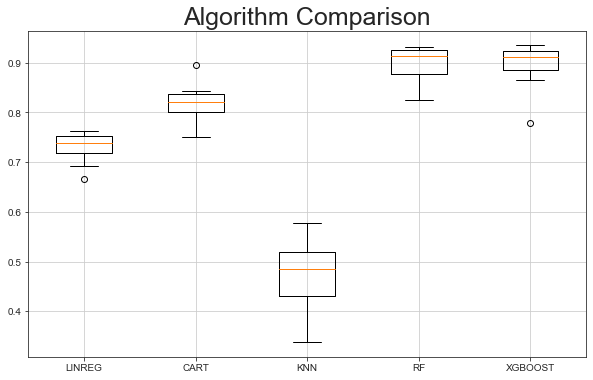

In [75]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

As we see above accuracy score result we can say that Random forest regressor gives better accuracy with very low standard deviation.


## <span style='color:Maroon'> Random Forest Regressor </span>

We will build a random forest regressor model.<br>
We will also use RandomizedSearchCV.<br> 
* In RandomizedSearchCV not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [76]:
rfreg=RandomForestRegressor()

### Hyper parameter tuning

In [78]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [79]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [80]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfreg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=123, n_jobs = 1)

In [81]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   4.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   4.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=123, scoring='neg_mean_squared_error',
                   verbose=2)

The result of a hyperparameter optimization is a single set of well-performing hyperparameters that you can use to configure your model.

In [82]:
print("The best parameters finalized for random forest regressor")
rf_random.best_params_

The best parameters finalized for random forest regressor


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [83]:
rf_random.best_score_

-133884233577.35501

In [84]:
## <span style='color:Maroon'> Make predictions on holdout sample </span>

In [85]:
y_predicted=rf_random.predict(X_test)

In [86]:
print("Test set accuracy : ",r2_score(y_test, y_predicted))

Test set accuracy :  0.9161536711496185


In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted)) 
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 158949.95541972152
Mean Absolute Percentage Error: 0.21733872788258643
Mean Squared Error: 96702599464.27417
Root Mean Squared Error: 310970.41573801544


## <span style='color:Maroon'> Comparision of Predictions with Actual Values </span>

We can use scatter plot and distribution graph to visually understand how our predicted values compare to actual values

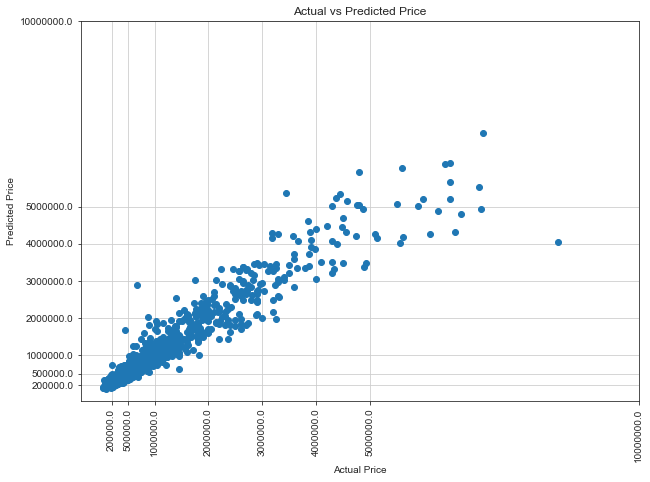

In [88]:
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
ax.set(xticks=(2e+05,5e+05,1e+06,2e+06,3e+06,4e+06,5e+06,1e+07))
ax.set_xticklabels((2e+05,5e+05,1e+06,2e+06,3e+06,4e+06,5e+06,1e+07), rotation=90)
ax.set(yticks=(2e+05,5e+05,1e+06,2e+06,3e+06,4e+06,5e+06,1e+07))
ax.set_yticklabels((2e+05,5e+05,1e+06,2e+06,3e+06,4e+06,5e+06,1e+07))

plt.show()

With the help of above scatter plot we can understand that<br>
* The model is able to predict vehicles with lower selling price better.
* But as the selling price increases, predictions are not very reliable.

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

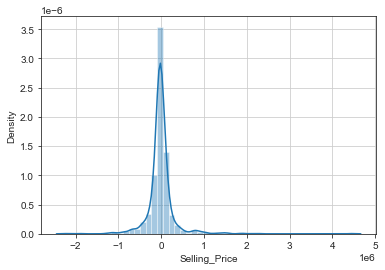

In [89]:
sns.distplot(y_test-y_predicted)

Though the distribution plot is a closed Gaussian distributed graph, the difference between ‘y_test’(Actual value)and ‘y_predicted’ (Prerdicted value) is spread across a wide range.

# <span style='color:Blue'> Make Predictions on Test Data </span>


In [90]:
y_predicted=rf_random.predict(test_df)

In [91]:
final_result=pd.DataFrame(y_predicted, index =list(test_df.index)).rename(columns={0:'Predicted_Selling_Price'})
final_result

,Predicted_Selling_Price
0,2642335.0
1,3217420.0
2,2813520.0
3,2325320.0
4,1798910.0
...,...
1229,1636715.0
1230,2066095.0
1231,2130345.0
1232,2630070.0
